In [85]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import random


In [87]:

X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [89]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,0.338827,1.188354,1.325362,1.668133,1.468354,0
1,-0.257397,-1.804302,-1.994450,2.935798,0.223633,1
2,1.944292,0.242699,0.956567,-0.028385,-0.329970,0
3,-1.545595,4.062637,0.312451,-0.003807,0.457946,0
4,1.600769,0.644154,1.798382,1.951834,1.544747,0


In [91]:

# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [93]:
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [95]:
#function for combined sampling 

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [101]:
df1 = combined_sampling(df,0.5,0.5)

C:\Users\DELL\AppData\Local\Temp\ipykernel_3236\1824989938.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [99]:
df2 = combined_sampling(df,0.5,0.5)

C:\Users\DELL\AppData\Local\Temp\ipykernel_3236\1824989938.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [103]:
df3 = combined_sampling(df,0.5,0.5)

C:\Users\DELL\AppData\Local\Temp\ipykernel_3236\1824989938.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [105]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col2', 'col1', 'target'], dtype='object')
Index(['col1', 'col4', 'target'], dtype='object')
Index(['col3', 'col5', 'target'], dtype='object')


In [107]:
df3

,col3,col5,target
13,-2.892677,1.756389,1
36,1.813517,1.602057,0
50,-0.654668,0.447563,1
60,0.249801,0.504576,0
72,0.133037,0.368762,1
97,-0.298966,-0.182685,1
5,2.157999,-2.474795,0
57,-2.550288,2.504443,1
95,1.558872,0.425677,1
64,0.913516,-2.029042,1


In [118]:
from sklearn.tree import DecisionTreeClassifier
clf1= DecisionTreeClassifier()
clf2= DecisionTreeClassifier()
clf3= DecisionTreeClassifier()


In [120]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [122]:
from sklearn.tree import plot_tree

[Text(0.3333333333333333, 0.9, 'x[1] <= -0.721\ngini = 0.5\nsamples = 50\nvalue = [25, 25]'),
 Text(0.16666666666666666, 0.7, 'gini = 0.0\nsamples = 21\nvalue = [0, 21]'),
 Text(0.25, 0.8, 'True  '),
 Text(0.5, 0.7, 'x[0] <= -1.616\ngini = 0.238\nsamples = 29\nvalue = [25, 4]'),
 Text(0.41666666666666663, 0.8, '  False'),
 Text(0.3333333333333333, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6666666666666666, 0.5, 'x[1] <= 0.455\ngini = 0.137\nsamples = 27\nvalue = [25, 2]'),
 Text(0.5, 0.3, 'x[0] <= 0.806\ngini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6666666666666666, 0.1, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.8333333333333334, 0.3, 'gini = 0.0\nsamples = 18\nvalue = [18, 0]')]

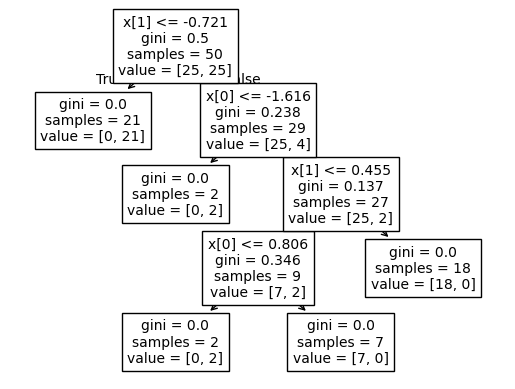

In [124]:
plot_tree(clf1)

[Text(0.45454545454545453, 0.9444444444444444, 'x[0] <= -0.383\ngini = 0.499\nsamples = 50\nvalue = [26, 24]'),
 Text(0.18181818181818182, 0.8333333333333334, 'x[0] <= -0.652\ngini = 0.091\nsamples = 21\nvalue = [1, 20]'),
 Text(0.3181818181818182, 0.8888888888888888, 'True  '),
 Text(0.09090909090909091, 0.7222222222222222, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]'),
 Text(0.2727272727272727, 0.7222222222222222, 'x[0] <= -0.629\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.18181818181818182, 0.6111111111111112, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.36363636363636365, 0.6111111111111112, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.7272727272727273, 0.8333333333333334, 'x[0] <= 1.59\ngini = 0.238\nsamples = 29\nvalue = [25, 4]'),
 Text(0.5909090909090909, 0.8888888888888888, '  False'),
 Text(0.6363636363636364, 0.7222222222222222, 'x[0] <= 1.435\ngini = 0.346\nsamples = 18\nvalue = [14, 4]'),
 Text(0.5454545454545454, 0.6111111111111112, 'x[1] <= 0.694\ng

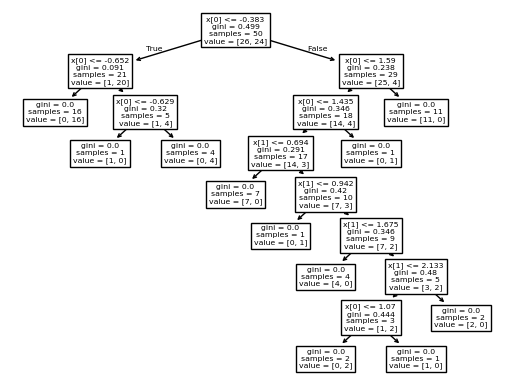

In [126]:
plot_tree(clf2)

[Text(0.4230769230769231, 0.9166666666666666, 'x[0] <= 0.16\ngini = 0.403\nsamples = 50\nvalue = [14.0, 36.0]'),
 Text(0.15384615384615385, 0.75, 'x[1] <= 4.271\ngini = 0.067\nsamples = 29\nvalue = [1, 28]'),
 Text(0.28846153846153844, 0.8333333333333333, 'True  '),
 Text(0.07692307692307693, 0.5833333333333334, 'gini = 0.0\nsamples = 27\nvalue = [0, 27]'),
 Text(0.23076923076923078, 0.5833333333333334, 'x[1] <= 4.76\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.15384615384615385, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3076923076923077, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6923076923076923, 0.75, 'x[1] <= 0.465\ngini = 0.472\nsamples = 21\nvalue = [13, 8]'),
 Text(0.5576923076923077, 0.8333333333333333, '  False'),
 Text(0.5384615384615384, 0.5833333333333334, 'x[0] <= 1.563\ngini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(0.46153846153846156, 0.4166666666666667, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 T

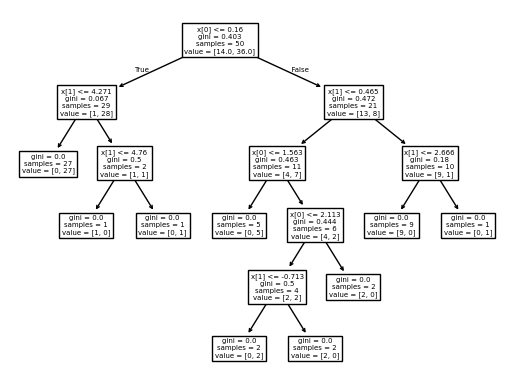

In [128]:
plot_tree(clf3)

In [130]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [132]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))